<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_out_2020/blob/main/PSD_GRAIN_NOT_GRAIN_out_16_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 2.5MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:

!git clone https://github.com/ucfilho/marquesgabi_out_2020/
%cd marquesgabi_out_2020
from Get_PSDArea import PSDArea

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.
/content/marquesgabi_out_2020


In [5]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020


In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 287 (delta 15), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (287/287), 78.56 MiB | 42.32 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado


In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [8]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 287 (delta 15), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (287/287), 78.56 MiB | 42.23 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [9]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

Cloning into 'marquesgabi_set_2020'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 266 (delta 44), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (266/266), 7.00 MiB | 27.05 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020


In [10]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [11]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 287 (delta 15), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (287/287), 115.72 MiB | 39.54 MiB/s, done.
Resolving deltas: 100% (132/132), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [12]:
df=Segmenta(img)


In [13]:
print(df)

    Width          0          1  ...         781         782         783
0     143  81.893639  86.396156  ...   50.484818   44.578857   40.119663
1     189  62.533607  62.089161  ...   69.517143   70.611794   72.598083
2     103  27.453106  29.927607  ...   53.338764   53.547173   56.026390
3     110   2.421488   3.717355  ...  102.142815   91.640327   90.430405
4     107  59.563805  56.636387  ...   65.184212   67.322739   75.913010
..    ...        ...        ...  ...         ...         ...         ...
45    125  44.378117  40.507137  ...  140.142288  137.277496  134.073029
46    112  89.375000  87.000000  ...   77.750000   77.687500   76.062500
47    133   0.000000   0.110803  ...    7.947369    8.113573    8.711911
48    189   1.032922   1.480110  ...  103.071335  108.901230  114.207138
49    130  81.828400  81.420822  ...    7.865799    8.829350    8.718107

[150 rows x 785 columns]


In [14]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 8.9042 - accuracy: 0.4606
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.4053 - accuracy: 0.5015
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5137 - accuracy: 0.5306
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.8810 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9984 - accuracy: 0.4985
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.6968
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8376 - accuracy: 0.4985
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.6910
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3324 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0884 - accuracy: 0.5044
Epoch 11/

In [15]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 11.6789 - accuracy: 0.4519 
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0493 - accuracy: 0.5015
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0803 - accuracy: 0.5831
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5357 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 1.4901 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7579 - accuracy: 0.5831
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9845 - accuracy: 0.5131
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2288 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0048 - accuracy: 0.5627
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5423
Epoch 1

In [16]:
print(confusion_matrix)

Predicted   0   1
Actual           
0          72   0
1           0  75


In [17]:
df.shape

(150, 785)

In [18]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [19]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 287 (delta 15), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (287/287), 78.56 MiB | 42.86 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado/Doutorado


In [20]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

img=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [21]:
df=Segmenta(img)

In [22]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 14.5908 - accuracy: 0.4606
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 2.5902 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9099 - accuracy: 0.5335
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9250 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7652 - accuracy: 0.5802
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1098 - accuracy: 0.4956
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.6356
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 2.4796 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 2.6936 - accuracy: 0.4956
Epoch 11

In [23]:
# print(y_pred.ravel())

In [24]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [25]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [26]:
# print(len(y_pred.ravel()))

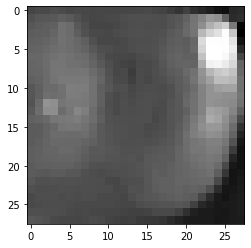

In [27]:
Size=28
qual_img=40
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [28]:
mean_value = np.mean(img)
img_new = img.copy()

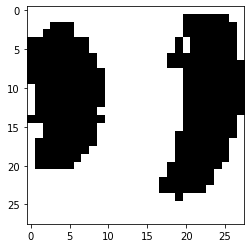

In [29]:

for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0

img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [30]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

6947.816326530612


In [31]:
Area_todas=PSDArea(df_size)
print(Area_todas[qual_img])

0 ========


IndexError: ignored

In [ ]:
df_size.shape

In [ ]:
Area_todas

In [ ]:
print(Area_todas)